<a href="https://colab.research.google.com/github/rajusuthar/price-prediction-of-car-using-machine-learning-model/blob/main/Copy_of_Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [301]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [302]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [303]:
#creating directory path for dataset
dir_path='/content/drive/MyDrive/Copy of Car details v3.csv'


In [304]:
#creating dataframe
car_df=pd.read_csv(h)

In [305]:
#first thing first so lets have a look on our dataframe
car_df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [306]:
#checking shape 
car_df.shape

(8128, 13)

In [307]:
#let's see discription of dataset
car_df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [308]:
#let see about dataset null value and also datatype
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


#There are 8128 total row but in some columns like mileage,engine,max_power ,torque,seats we have some null values

#so for now let's drop these row ,i assume that these row have missing value 

In [309]:
car_df=car_df.dropna().reset_index(drop=True)

In [310]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 803.1+ KB


#Now we don't have any null or missing value in out dataframe

#There are some column like  mileage and engien and power with value unit is also given so let's remove unit of these column

In [311]:
#remove unit
def remove_unit(col):
  '''
  This function take column row as argument an return float without unit
  '''
  my_list=[]
  for i in car_df[col]:
    num=str(i).split(' ')[0]
    my_list.append(float(num))
  return my_list


In [312]:
car_df['engine'] = remove_unit('engine')
car_df['mileage'] = remove_unit('mileage')
car_df['max_power'] = remove_unit('max_power')

#In our dataframe one column torque information given in this column is i think not usable so first remove this column

In [313]:
car_df.drop(['torque'],axis=1,inplace=True)

In [314]:
car_df['name'].value_counts()

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Audi Q5 45 TDI quattro Technology                    1
Mahindra Xylo E8 ABS Airbag BSIV                     1
Ford Figo Aspire 1.5 Ti-VCT Titanium                 1
Mercedes-Benz New C-Class C 220 CDI Elegance MT      1
Honda City i DTec E                                  1
Name: name, Length: 1982, dtype: int64

#Most of the car in our dataframe is of Maruti company so i think we don't need name of company as well bcz there are 1982 company car available and in number very few car of each company except maruti

In [315]:
#dropping name column 
car_df.drop(['name'],axis=1,inplace=True)

In [316]:
car_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


#before we go ahead first lets see the distribution of selling price of car

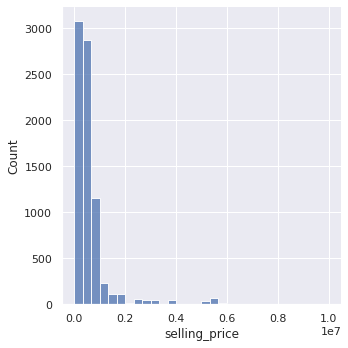

In [317]:
sns.displot(data=car_df['selling_price'],bins=30)

#our selling price is positively skewed ,let try to convert this to normally distribution

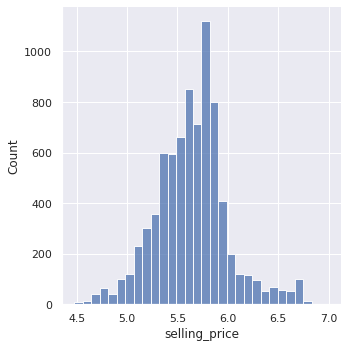

In [318]:
#doing log transformation of selling price
sns.displot(data=np.log10(car_df['selling_price']),bins=30)

#we can see from this heatmap that now our selling price is normally distributed

In [277]:
numerical_feature=car_df.describe().columns

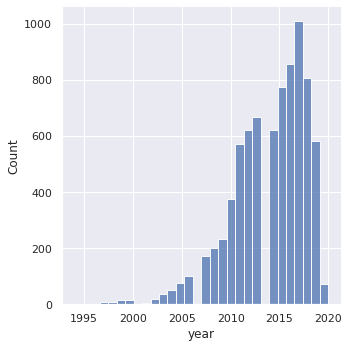

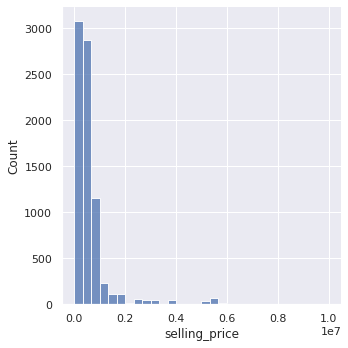

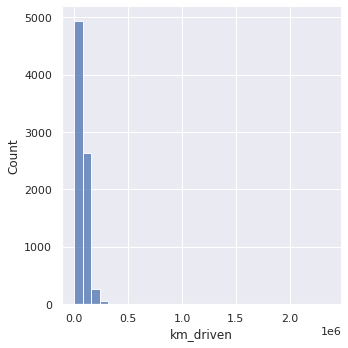

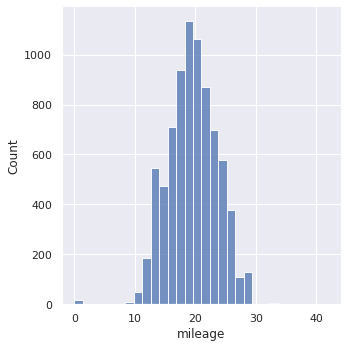

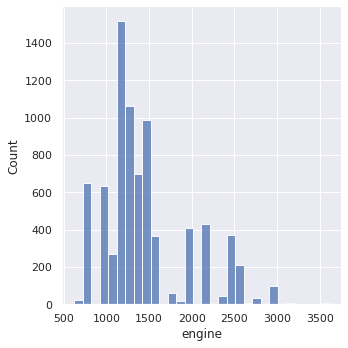

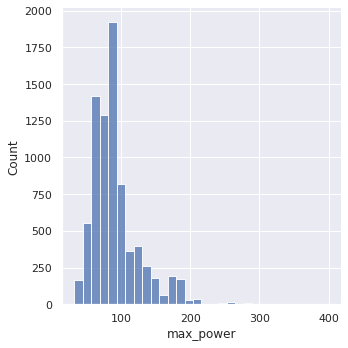

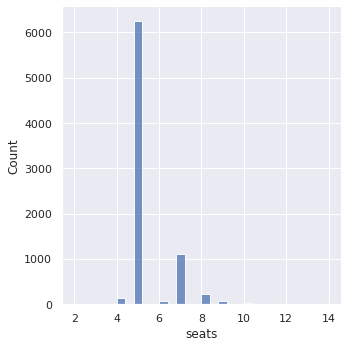

In [319]:
for col in numerical_feature:
  sns.displot(data=car_df[col],bins=30)

#We can say that from above distplot that some of variable have normally distribution

#Till now we have seen numerical variable now let see categorical values

In [279]:
category_feature=car_df.describe(include=['object','category']).columns

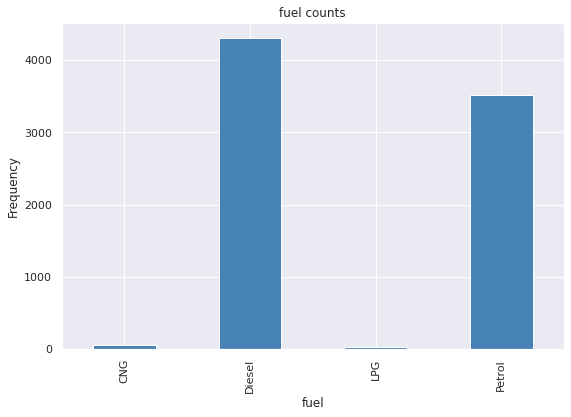

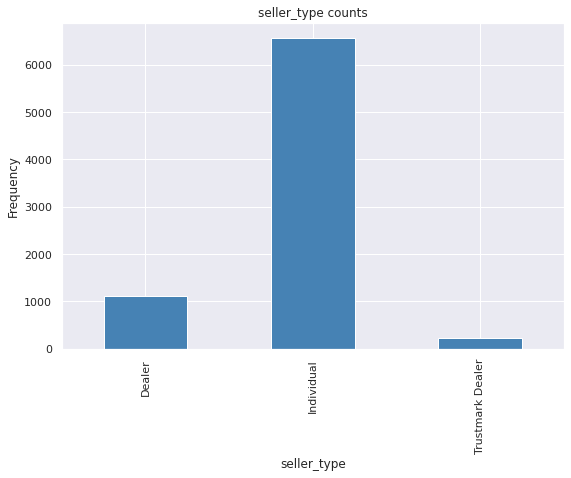

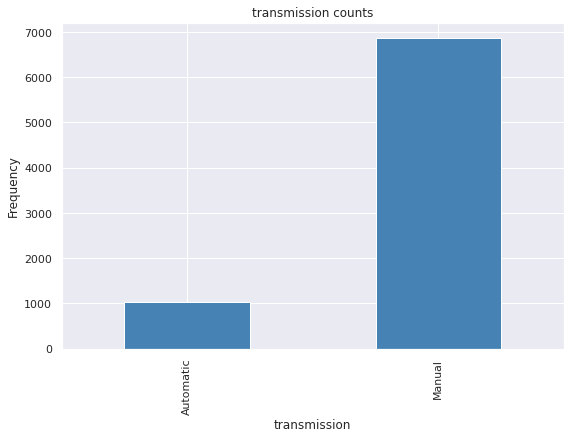

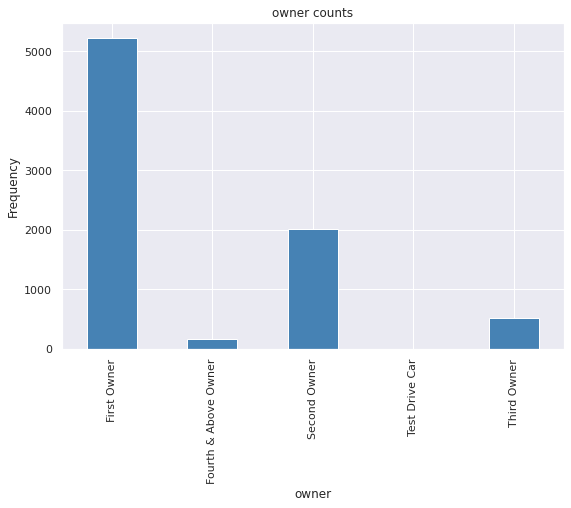

In [320]:
for col in category_feature:
  counts =car_df[col].value_counts().sort_index()
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  counts.plot.bar(ax = ax, color='steelblue')
  ax.set_title(col + ' counts')
  ax.set_xlabel(col) 
  ax.set_ylabel("Frequency")

#In fuel CNG and LPG used very rarely so we can remove these
#in seller type column trust_mark dealer is very less i think we can remove this as well and in owner test drive car 

In [321]:
car_df =  car_df[car_df.fuel != 'CNG']
car_df =  car_df[car_df.fuel != 'LPG']


#we have categorical value so lets encode this value in numerical ones

In [322]:
ColumsToConvert = [column for column in car_df.columns if car_df[column].dtype == 'O']
ColumsToConvert

['fuel', 'seller_type', 'transmission', 'owner']

In [323]:
def transform_col(df,Col):
    for i in Col:
        c = pd.get_dummies(df[i],prefix= i, drop_first =True)
        df = pd.concat ([df,c], axis = 1)
        df.drop(i , axis =1, inplace = True)

    return df 

In [324]:
car_df=transform_col(car_df,ColumsToConvert)

In [325]:
car_df

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.40,1248.0,74.00,5.0,0,1,0,1,0,0,0,0
1,2014,370000,120000,21.14,1498.0,103.52,5.0,0,1,0,1,0,1,0,0
2,2006,158000,140000,17.70,1497.0,78.00,5.0,1,1,0,1,0,0,0,1
3,2010,225000,127000,23.00,1396.0,90.00,5.0,0,1,0,1,0,0,0,0
4,2007,130000,120000,16.10,1298.0,88.20,5.0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,320000,110000,18.50,1197.0,82.85,5.0,1,1,0,1,0,0,0,0
7902,2007,135000,119000,16.80,1493.0,110.00,5.0,0,1,0,1,1,0,0,0
7903,2009,382000,120000,19.30,1248.0,73.90,5.0,0,1,0,1,0,0,0,0
7904,2013,290000,25000,23.57,1396.0,70.00,5.0,0,1,0,1,0,0,0,0


#Till now we cleaned and converted our dataframe ,so now lets see correlation between diffrent diffrent variable

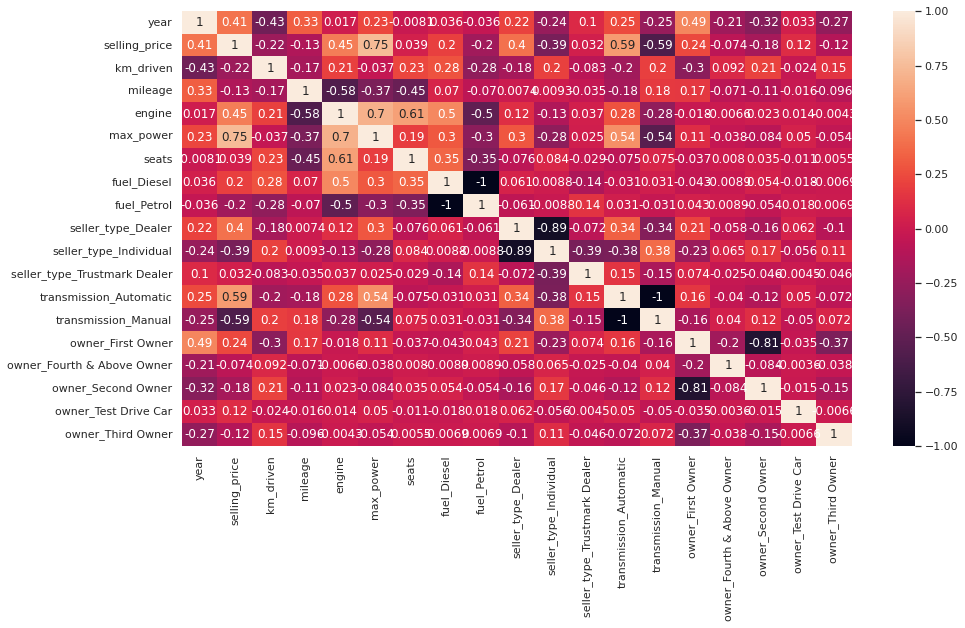

In [284]:
#creating heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(car_df.corr(),annot=True)

In [285]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [286]:
calc_vif(car_df[[i for i in numerical_feature if i not in ['year','selling_price']]])

,variables,VIF
0,km_driven,2.760779
1,mileage,13.289277
2,engine,39.610990
3,max_power,17.506200
4,seats,39.498384


#Seat and engine are correlated to each other but as per above heat map seat is very lessly correlated with selling price so lets remove seats

#engine and max power is highly correlated so lets use any one for our model 

In [225]:
calc_vif(car_df[[i for i in numerical_feature if i not in ['year','selling_price','seats','engine']]])

,variables,VIF
0,km_driven,2.259839
1,mileage,5.102744
2,max_power,4.748205


#As per the VIF and heatmap we can remove seats,year,engine bcz of multicollinearity and also less correlated with our selling price

In [344]:
car_df.drop(['seats','year','engine'],axis=1,inplace=True)

#Now we have cleaned data and our data is ready for modelling ,

In [326]:
dependent_variable='selling_price'

In [345]:
# Create a list of independent variables
independent_variables = list(set(car_df.columns.tolist()) - {dependent_variable})

In [347]:
# Create the data of independent variables
X = car_df[independent_variables].values

# Create the dependent variable data
y = car_df[dependent_variable].values

In [348]:
#splitting our dataset into test and train dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [349]:
#before move forward lets scale our dataset
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)

In [350]:
#now lets fit our data in regression model
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [351]:
#let's see out model parameter value
regressor.coef_

array([ -53602.63583208, -100723.53119497,  -28984.72222211,
        -46873.16069655,  -84867.03778479, -165103.52680203,
        515575.54392642,   93220.5396237 ,   47402.19373658,
        -26260.43266819,  -18628.93755992])

In [352]:
#intercept value
regressor.intercept_

654465.1801758471

In [353]:
#prediction on training dataset
y_train_pred=regressor.predict(X_train)

In [354]:
#prediction on test dataset
y_test_pred=regressor.predict(X_test)

In [355]:
mean_squared_error(y_test,y_test_pred)

217601496177.68134

In [356]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.6609712993017309

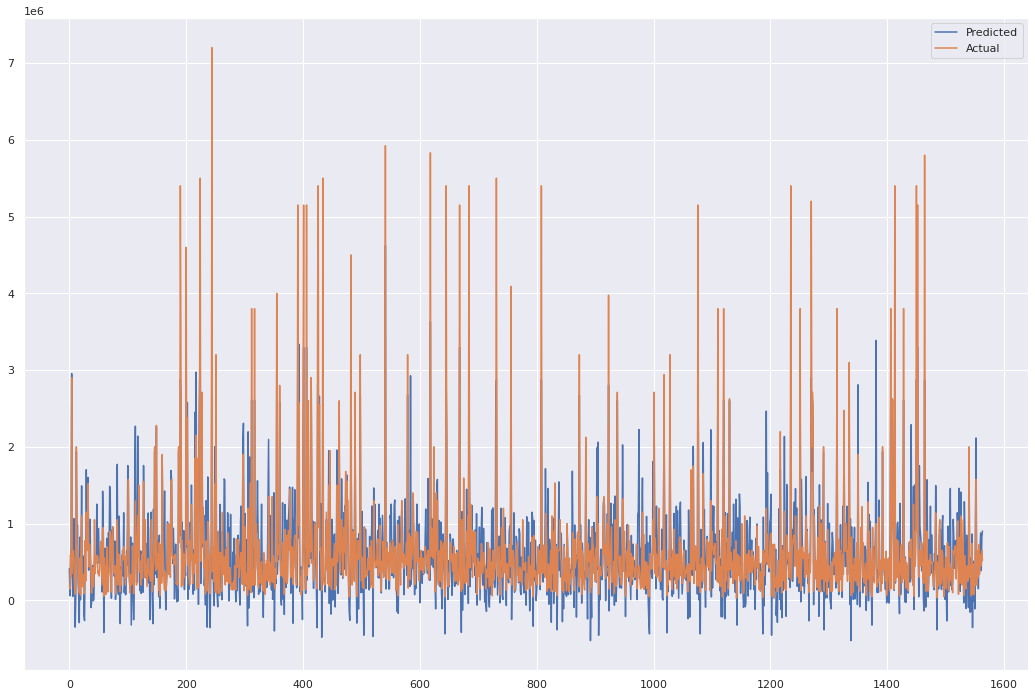

In [357]:
plt.figure(figsize=(18,12))
plt.plot((y_test_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#In our linear regression model r2 score is 66% ,and also we can see from this above graph that out perdicted value is following the pattern of actual value but less in value .

#we try to reugulerized our model using lasso and ridge regression so lets see how much we can improve our model using regulerisation

In [380]:
#using lasso regression for regulerisation
lasso_train_list=[]
lasso_test_list=[]
for alphas in [.0000001,.000001,.00001,.0001,.001,.01,.1,.2,.3,.5,.6,.7,.8,.9,1,2,3,4,5,6,7,8]:
  lasso=Lasso(alpha=alphas)
  lasso.fit(X_train,y_train)
  lasso_y_train_pred=lasso.predict(X_train)
  a=r2_score(y_train, lasso_y_train_pred)
  lasso_train_list.append(a)
  lasso_test_pred=lasso.predict(X_test)
  b=r2_score(y_test, lasso_test_pred)
  lasso_test_list.append(b)

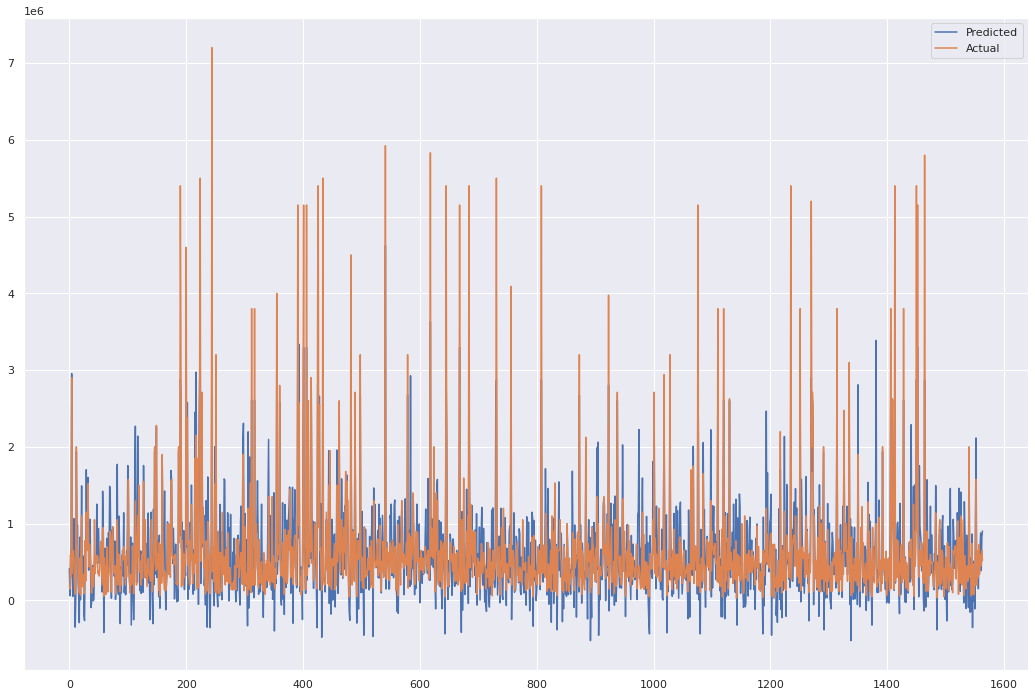

In [390]:
lasso=Lasso(alpha=.0001)
lasso.fit(X_train,y_train)
lasso_y_train_pred=lasso.predict(X_train)
lasso_test_pred=lasso.predict(X_test)
plt.figure(figsize=(18,12))
plt.plot((lasso_test_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#I used diffrent range of value of alpha , and also stroed r2 score in list ,to see at what value of alpha our r2 is maximum 

In [382]:
#at which value of alpha r2 score is max for test perdiction
max(lasso_test_list)

0.6609712993017227

In [383]:
lasso_test_list.index(max(lasso_test_list))

0

#Using lasso regression regulerisation technique i am not geeting any improvement in r2 score and also thier is not that much effect of alpha value

#now let see ridge regression 

#Using lasso regression reguer

In [386]:
#using ridge regression for regulerisation
ridge_train_list=[]
ridge_test_list=[]
for alphas in range(1,10000):
  ridge=Ridge(alpha=alphas)
  ridge.fit(X_train,y_train)
  ridge_y_train_pred=ridge.predict(X_train)
  a=r2_score(y_train, ridge_y_train_pred)
  ridge_train_list.append(a)
  ridge_test_pred=ridge.predict(X_test)
  b=r2_score(y_test, ridge_test_pred)
  ridge_test_list.append(b)

In [387]:
max(ridge_test_list)

0.6622677430441238

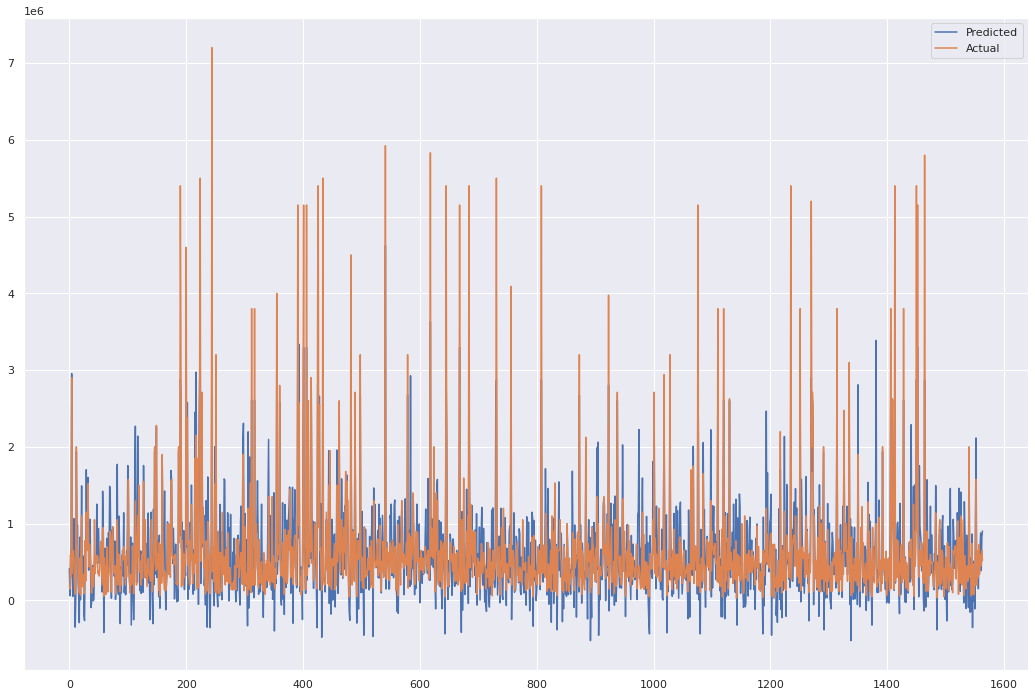

In [389]:
ridge=Ridge(alpha=1000)
ridge.fit(X_train,y_train)
ridge_y_train_pred=lasso.predict(X_train)
ridge_test_pred=lasso.predict(X_test)
plt.figure(figsize=(18,12))
plt.plot((ridge_test_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#WE can see the graph of actual value and predicted value for lasso ,ridge,linear regression ,we can clearly say that for this particular problem regulerization doesn't helps us .we are getting the same result for all linear model ,

**#IMPORTANT:-**
#Approach:-In linear regression model we always start with an assumption that there is linear relationship between dependent and independent variable ,before we ho ahead its really important to look on our dataset ,bcz it's possiable that there should be some null or missing values and also there some categorical values which we can't directly feed into our model ,so before we go ahead to creat our model ,feature engineering is most important step,we always need to think in term of business prespective while doing feature engineering,as a data scientist,we can't directly jump to model building,we have to understand how our independent variable are related to dependent variable using different different graph like scatterplot,heatmap.  also it really important that our dependent variable should follow a normal distribution ,if not than depend on skewness of dependent variable ,we will use transfomation,,
#once feature engineering part is done then our data is ready to fit in our model ,then we can train our model  and also test our model (like how our model is  predicting on unseen data) ,if required than we also do regulerisation of our model..


#MY_first machine_learning_model on :_ "CAR_DEKHO"  dataset
#Observed_result:- firstly i used linear regression model and i found that my model is following the actual pattern of actual value but  actual value is higher than predicted value (not much diffrence).bcz of the high varience i thought let's regulerze my model if it will  better or i can improve it ,so for regulerization i used LASSO and RIDge regression model ,for theses regresssion i take alpha range from .0000001 to 10000 but when i saw the result my model not improved ,in all these three model , i have 66% accuracy of perdiction ,
#for now i have no idea like what other technique i can use to improve my model prediction but it's first project to just "continue_learning